In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

import tqdm

%matplotlib inline

import sherlock # eset kivizsgalo szimulator

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df =  pd.read_csv("./data/Dataset_Anomaly_Init_R2.csv") # dataset
sec = pd.read_csv("./data/Dataset_Anomaly_Secret_R2.csv") # megoldas

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,ID
0,8,10,12,8,9,10,6,2,5,9,5,7,8,7,2,8,0
1,4,2,5,3,3,8,6,6,4,6,7,8,7,6,2,6,1
2,2,0,3,1,1,7,8,4,0,7,8,8,7,9,0,8,2
3,2,3,3,2,2,7,9,5,4,7,6,7,5,9,2,7,3
4,5,9,8,7,5,7,9,2,4,10,5,6,5,9,1,7,4


In [4]:
df.shape

(2467, 17)

In [5]:
# odaadjuk az eset kivizsgalonak a megoldasokat es meghatarozunk egy budzset, ahanyszor kerdezhetunk toluk - 111
expert = sherlock.Sherlock(sec, 111)

In [6]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 0 		max: 111


In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
isof = IsolationForest(n_estimators = 100,random_state=42)

In [9]:
bemeno_valtozok = list(df.columns)[:8]
bemeno_valtozok

['1', '2', '3', '4', '5', '6', '7', '8']

In [10]:
isof.fit(df[bemeno_valtozok])

IsolationForest(random_state=42)

In [11]:
df['isof_flag'] = isof.predict(df[bemeno_valtozok])

In [12]:
df['isof_flag'].value_counts()

 1    2034
-1     433
Name: isof_flag, dtype: int64

In [13]:
df['isof_score'] = isof.decision_function(df[bemeno_valtozok])*-1

<AxesSubplot:>

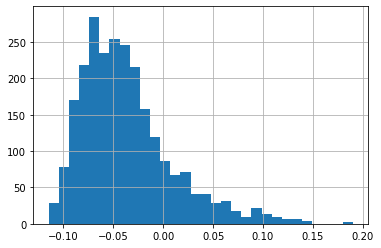

In [14]:
df['isof_score'].hist(bins=30)

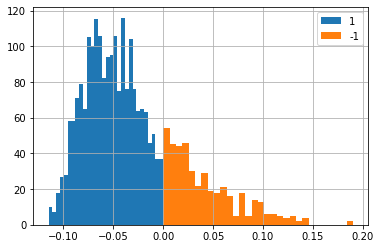

In [15]:
for i in [1,-1]:
    cdf = df[df['isof_flag']==i]
    cdf['isof_score'].hist(bins=30,label=str(i))
plt.legend()

In [16]:
def top10megnez(df,valtozo,szam=10):
    mydf = df[df['info']=='no_info']
    kivalasztottak = mydf.sort_values(valtozo,ascending = False).head(szam)
    print(kivalasztottak)
    expert.investigate(kivalasztottak['ID'])
    df2 = expert.add_label(df,'info')
    return df2

In [17]:
df['info'] = 'no_info'
df = top10megnez(df,"isof_score")

       1   2   3  4  5   6   7   8  9  10  11  12  13  14  15  16    ID  \
2460   1   0   1  0  0   2   2   5  4   1   2   6   0   8   0   8  2460   
2279  11  15  13  9  7  13   2   6  2  12   1   9   8   1   1   8  2279   
976   14  15  14  8  7  10  11   7  4   4   6  10  10  13   3   6   976   
950   15  15  15  8  8   3   9   6  6   3   2  13  10  12   2   8   950   
1106   3  12  11  0  1   3  12  11  0   1   3  12  11   0   1   3  1106   
1693  15  15  15  8  7   9  11   6  4   4   6  10  11  13   2   6  1693   
629    3   4   3  6  1   0   1   5  6   0   0   7   0   8   0   8   629   
2367  13  15  13  8  7   3   8   6  6   4   2  13   9  11   2   8  2367   
2399   3   7   3  5  1   0   1   6  6   0   0   6   0   8   0   8  2399   
2153  10  15  12  9  6  10   2   3  2  10   3   9   8   1   1   8  2153   

      isof_flag  isof_score     info  
2460         -1    0.190142  no_info  
2279         -1    0.187617  no_info  
976          -1    0.145662  no_info  
950          -1   

In [18]:
kivalasztottak = df[df['info']=='no_info'].sample(20,random_state=42)

In [19]:
expert.investigate(kivalasztottak['ID'])

	Nyomozás eredménye	720	->	ok
	Nyomozás eredménye	786	->	csalás
	Nyomozás eredménye	1610	->	ok
	Nyomozás eredménye	868	->	ok
	Nyomozás eredménye	1087	->	ok
	Nyomozás eredménye	650	->	ok
	Nyomozás eredménye	1782	->	ok
	Nyomozás eredménye	652	->	ok
	Nyomozás eredménye	237	->	ok
	Nyomozás eredménye	737	->	ok
	Nyomozás eredménye	1293	->	ok
	Nyomozás eredménye	1275	->	ok
	Nyomozás eredménye	406	->	ok
	Nyomozás eredménye	521	->	ok
	Nyomozás eredménye	979	->	ok
	Nyomozás eredménye	353	->	ok
	Nyomozás eredménye	1390	->	ok
	Nyomozás eredménye	1174	->	ok
	Nyomozás eredménye	2283	->	csalás
	Nyomozás eredménye	620	->	ok


In [20]:
kmeans = KMeans(n_clusters=16,random_state=42)

In [21]:
bemeno_valtozok = list(df.columns)[:9]
bemeno_valtozok

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [22]:
kmeans.fit(df[bemeno_valtozok])

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=16, random_state=42)

In [ ]:
kmeans.cluster_centers_[4]

In [23]:
ujak = []
for i in range(kmeans.n_clusters):
    nev = 'cdist_'+str(i)
    df[nev]=0
    ujak.append(nev)
    

<AxesSubplot:>

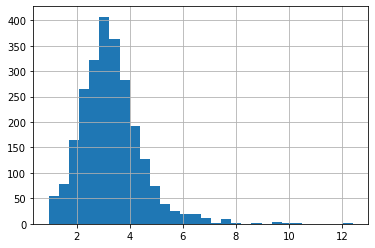

In [24]:
df[ujak]=kmeans.transform(df[bemeno_valtozok])
df['cid']=kmeans.predict(df[bemeno_valtozok])

def f(x):
    nev = 'cdist_'+str(x['cid'])
    return x[nev]

df['myc_dist']=df.apply(f,axis=1)
df['myc_dist'].hist(bins=30)

In [25]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 30 		max: 111
  Ismert csalás = 6
  Felderítési arány = 20.0%


In [29]:
df = expert.add_label(df,'info')

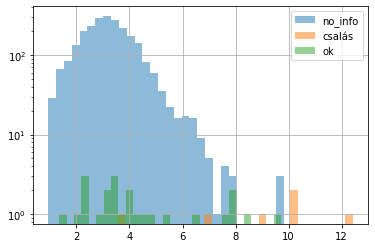

In [30]:
def score_diagram(df,vizsgalat):
    plt.yscale('log')
    for tipus in ['no_info','csalás','ok']:
        cdf=df[df['info']==tipus]
        cdf[vizsgalat].hist(bins=30,label=tipus,alpha=0.5)
    plt.legend()
score_diagram(df,'myc_dist')

In [31]:
top10megnez(df,'myc_dist')

       1   2   3  4  5   6   7  8   9  10  ...   cdist_10   cdist_11  \
2033   2   3   3  4  1   0   1  5   6   0  ...  16.423991  10.977360   
1578   2  11   3  8  2  15   4  4   5  13  ...   9.728737  10.793630   
828    3   8   3  6  2   0   2  4   6   1  ...  13.707224   9.669666   
1942   2   8   3  5  1   8  13  0   6   6  ...  12.870765   9.552077   
1069   3   7   4  5  2   4   4  3  10   2  ...  11.927621   7.756286   
908    3   4   3  6  2   3   8  6  10   7  ...  14.460961   7.749218   
1854  10  14  11  8  5  13   1  5   3  13  ...   7.718415  14.709366   
1522   2   9   4  7  2   7  13  0   5   7  ...  11.932124   9.447532   
1542   3   6   4  4  2   4  14  8   1  11  ...  15.105810   9.052116   
2129   3   9   3  6  2   3   6  6  10   7  ...  12.783139   7.646002   

       cdist_12   cdist_13   cdist_14   cdist_15  cid  myc_dist       in  \
2033  19.259536  12.072546  14.021199  12.089241    5  9.810413  no_info   
1578  15.447446  14.372223  11.178237  16.007519   10  

,1,2,3,4,5,6,7,8,9,10,...,cdist_10,cdist_11,cdist_12,cdist_13,cdist_14,cdist_15,cid,myc_dist,in,info
0,8,10,12,8,9,10,6,2,5,9,...,5.387809,11.807635,7.959792,14.940568,8.920829,19.289769,4,5.028184,no_info,no_info
1,4,2,5,3,3,8,6,6,4,6,...,11.282784,5.461795,15.393184,5.950307,9.602573,6.617108,5,2.534654,no_info,no_info
2,2,0,3,1,1,7,8,4,0,7,...,15.870459,10.279437,19.475026,6.009783,13.760466,1.089089,15,1.089089,no_info,no_info
3,2,3,3,2,2,7,9,5,4,7,...,13.240760,6.221569,16.412760,3.769652,10.063474,4.914240,5,2.593241,no_info,no_info
4,5,9,8,7,5,7,9,2,4,10,...,5.716763,6.503611,7.580259,8.433119,3.134452,13.605638,14,3.134452,no_info,no_info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,3,7,4,5,4,8,6,5,4,7,...,7.995064,2.487443,12.408486,6.760556,5.968221,9.489934,11,2.487443,no_info,no_info
2463,7,7,7,5,5,6,10,4,3,8,...,7.939048,5.765602,8.390417,6.667661,4.387239,11.735909,0,3.049905,no_info,no_info
2464,10,10,9,8,9,5,11,4,3,8,...,9.536119,11.337100,5.915314,13.395798,7.943981,18.439205,7,4.672462,no_info,no_info
2465,3,5,4,4,4,8,6,6,4,7,...,9.535686,2.927616,13.851660,6.176441,7.555210,8.021830,11,2.927616,no_info,no_info


In [ ]:
plt.plot(df[:0],df[:1],color='viridis')

In [ ]:
! cp ../__Gaspar_Csaba/STARTER_anomalia_detekcio.ipynb .

In [32]:
stat=df.groupby("cid").agg({'myc_dist':'mean'})

In [33]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=7)



In [36]:
bemeno_valtozok = list(df.columns)[:10]

In [37]:
nn.fit(df[bemeno_valtozok])

NearestNeighbors(n_neighbors=7)

In [39]:
a,b = nn.kneighbors(df[bemeno_valtozok])
df['knn_dist']=a[:,6]

KeyError: 'info'

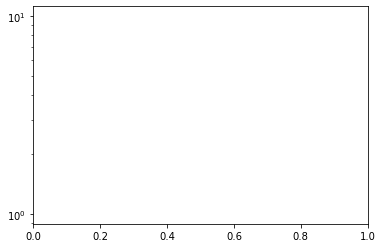

In [40]:
score_diagram(df,'knn_dist')

In [ ]:
df=top10megnez(df,'knn_dist')

In [ ]:
# logistic regression

In [ ]:
df['target'] = df['info'].apply(lambda x: 1 if x=='ok' else 0)

df['target'].value_counts()

from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(C=1,penalty='l1')
logreg = LogisticRegression(C=1,penalty='l2')

bemeno_valtozok = list(df.columns)[:11]

logreg.fit(df[bemeno_valtozok],df['target'])

df['logreg_egy']=logreg.predict_proba(df[bemeno_valtozok])[:,0]

score_diagram(df,'logreg_egy')

In [ ]:
df = top10megnez(df,'logreg_egy')

In [ ]:
df['target'] = df['info'].apply(lambda x: 1 if x=='ok' else 0)

bemeno_valtozok = list(df.columns)[:11]

logreg.fit(df[bemeno_valtozok],df['target'])

df['logreg_ketto']=logreg.predict_proba(df[bemeno_valtozok])[:,1]

score_diagram(df,'logreg_ketto')

In [ ]:
cdf=df[df['info']=='ok']
cdf['logreg_ketto'].hist(bins=30)

In [ ]:
df = top10megnez(df,'logreg_ketto')

In [ ]:
# rank atlag alapu megkozelites

In [ ]:
for modszer in ['logreg_egy','logreg_ketto','myc_dist','isof_score','knn_dist','dist_score']:
    df = df.sort_values(modszer,ascending=False).reset_index(drop=True)
    df[modszer+"_rank"]=df.index + 1
    rank_nevek.append(modszer+"_rank")


In [ ]:
df['final_score']=len(df)-df[rank_nevek].mean(axis=1)


In [ ]:
score_diagram(df,'final_score')

In [ ]:
df = top10megnez(df,'final_score',41)

In [42]:
expert.stat()

Adathalmaz mérete   = 2467
Ismert esetek száma = 40 		max: 111
  Ismert csalás = 15
  Felderítési arány = 37.5%


In [43]:
sec['info'].value_counts()

ok          2326
anomalia     141
Name: info, dtype: int64

In [44]:
141/len(df)

0.05715443858937981